In [1]:
import warnings
from plot_metric.functions import BinaryClassification
from pylab import rcParams
from tensorflow_core.python.keras.wrappers.scikit_learn import KerasClassifier
rcParams['figure.figsize'] = 10, 5
from sklearn.model_selection import GridSearchCV, train_test_split
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [2]:
data= pd.read_csv('../logis_norm.csv')

### split data en X et Y

In [3]:
data1= data.copy()
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

In [4]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)

### Neural Network

In [5]:
## ANN Model
def create_model(optimizer):
    model = Sequential()
	#Layer 1
    model.add(Dense(20, activation='relu', input_dim=20))
    model.add(Dropout(0.3))
    #Layer 2
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.3))
    
    # output layer
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50)
ANN = KerasClassifier(build_fn=create_model)

params={'optimizer' : ['adam', 'rmsprop'],
        'batch_size': [128, 256, 512, 800]}


##accuracy
grid_search_acc= GridSearchCV(estimator=ANN, param_grid= params, scoring='accuracy',cv=5, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train, epochs=400, validation_data=(X_test, Y_test), callbacks=[early_stop])
y_predict= grid_search_acc.best_estimator_.predict(X_test)

Train on 71786 samples, validate on 30766 samples
Epoch 1/400
71786/71786 [==============================] - 5s 76us/sample - loss: 0.6176 - accuracy: 0.6619 - val_loss: 0.5247 - val_accuracy: 0.7556
Epoch 2/400
71786/71786 [==============================] - 2s 34us/sample - loss: 0.5379 - accuracy: 0.7469 - val_loss: 0.4974 - val_accuracy: 0.7631
Epoch 3/400
71786/71786 [==============================] - 3s 43us/sample - loss: 0.5206 - accuracy: 0.7588 - val_loss: 0.4925 - val_accuracy: 0.7687
Epoch 4/400
71786/71786 [==============================] - 3s 46us/sample - loss: 0.5163 - accuracy: 0.7625 - val_loss: 0.4916 - val_accuracy: 0.7687
Epoch 5/400
71786/71786 [==============================] - 2s 34us/sample - loss: 0.5136 - accuracy: 0.7647 - val_loss: 0.4914 - val_accuracy: 0.7687
Epoch 6/400
71786/71786 [==============================] - 4s 50us/sample - loss: 0.5131 - accuracy: 0.7652 - val_loss: 0.4912 - val_accuracy: 0.7687
Epoch 7/400
71786/71786 [=========================

Epoch 55/400
71786/71786 [==============================] - 2s 21us/sample - loss: 0.5050 - accuracy: 0.7675 - val_loss: 0.4901 - val_accuracy: 0.7686
Epoch 56/400
71786/71786 [==============================] - 2s 25us/sample - loss: 0.5047 - accuracy: 0.7682 - val_loss: 0.4893 - val_accuracy: 0.7686
Epoch 57/400
71786/71786 [==============================] - 3s 35us/sample - loss: 0.5047 - accuracy: 0.7673 - val_loss: 0.4898 - val_accuracy: 0.7680
Epoch 58/400
71786/71786 [==============================] - 1s 19us/sample - loss: 0.5049 - accuracy: 0.7678 - val_loss: 0.4899 - val_accuracy: 0.7687
Epoch 59/400
71786/71786 [==============================] - 1s 21us/sample - loss: 0.5055 - accuracy: 0.7673 - val_loss: 0.4901 - val_accuracy: 0.7647
Epoch 60/400
71786/71786 [==============================] - 2s 32us/sample - loss: 0.5052 - accuracy: 0.7676 - val_loss: 0.4898 - val_accuracy: 0.7686
Epoch 61/400
71786/71786 [==============================] - 1s 21us/sample - loss: 0.5053 - ac

In [7]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'batch_size': 256, 'optimizer': 'adam'}
----------
[[10237  5122]
 [ 1993 13414]]
----------
              precision    recall  f1-score   support

           0       0.84      0.67      0.74     15359
           1       0.72      0.87      0.79     15407

    accuracy                           0.77     30766
   macro avg       0.78      0.77      0.77     30766
weighted avg       0.78      0.77      0.77     30766

----------


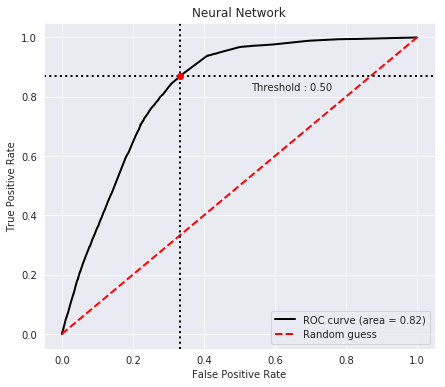

In [8]:
##ROC
y_predict_proba = grid_search_acc.best_estimator_.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_predict_proba, labels=[1, 0])
# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.title('Neural Network')
plt.show()

In [9]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=ANN, param_grid= params, scoring=rec_avg,cv=5, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train, epochs=400, validation_data=(X_test, Y_test), callbacks=[early_stop])
y_predict= grid_search_rec.best_estimator_.predict(X_test)

PicklingError: Could not pickle the task to send it to the workers.

In [ ]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")


In [ ]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=ANN, param_grid= params, scoring=prec_avg,cv=5, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train)
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

In [ ]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

In [ ]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        #ax.set_ylim([0.74,0.83])
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')


In [ ]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Precision')


In [ ]:
def return_index_list(param1, param2):
    list=[]
    for p1 in param1:
        for p2 in param2:
            list.append('['+str(p1)+', '+str(p2)+']')
    return list

In [ ]:
index= return_index_list(params['optimizer'], params['batch_size'])

df= pd.DataFrame({  'Accuracy': grid_search_acc.cv_results_['mean_test_score'],
                    'Precision(Avg)': grid_search_prec_avg.cv_results_['mean_test_score'],
                    'Recall(Avg)': grid_search_rec.cv_results_['mean_test_score'],},
                 index=index)

## to excel
writer = pd.ExcelWriter('Neural_Network.xlsx')
df.to_excel(writer, 'Neural_Network')
writer.save()
writer.close()

In [ ]:
df

In [ ]:
grid_search_acc.cv_results_

In [ ]:
## check for overfiting
model_ov= create_model("rmsprop")
history= model_ov.fit(x=X_train, y=Y_train, epochs=300, validation_data=(X_test, Y_test), verbose=1, callbacks=[early_stop])

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();